<a href="https://colab.research.google.com/github/plaban1981/DEEP-LEARNING-/blob/master/Keras_mannings_Chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMDB classification using Keras

In [4]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)
print(train_data.shape, test_data.shape)

(25000,) (25000,)


In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_labels [0]

1

In [7]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [8]:
type(word_index)

dict

In [12]:
max([max(sequence) for sequence in train_data])

9999

In [0]:
reversed_word_index  = dict([(value,key) for key,value in word_index.items()])

offset is reduced by 3 since 0,1 and 2 is preserved for 'paddding','start of sequence', and 'unkown'

In [18]:
" ".join([reversed_word_index.get( i -3,'?') for i in train_data[0]])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## prepare training data

In [21]:
len(train_data[0]),len(train_data[1])

(218, 189)

since the length of each tect is different we have to pad the lists to have the same length for each text

In [0]:
import numpy as np
def vectorize_sequences(sequence,dimension=10000):
  results = np.zeros((len(sequence),dimension))
  for i,item in enumerate(sequence):
    results[i,item] = 1.#one hot encoding
  return results

In [0]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [27]:
X_train.shape,X_test.shape

((25000, 10000), (25000, 10000))

In [0]:
from keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [29]:
y_train.shape,y_test.shape

((25000, 2), (25000, 2))

In [52]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(8,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(2,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['acc'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 8)                 80008     
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 18        
Total params: 80,098
Trainable params: 80,098
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = model.fit(X_train,y_train,epochs = 15, batch_size= 128,validation_data=(X_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 3s 111us/step - loss: 0.4681 - acc: 0.8216 - val_loss: 0.3314 - val_acc: 0.8841
Epoch 2/15
25000/25000 [==============================] - 3s 109us/step - loss: 0.2531 - acc: 0.9112 - val_loss: 0.2942 - val_acc: 0.8810
Epoch 3/15
25000/25000 [==============================] - 3s 108us/step - loss: 0.1954 - acc: 0.9278 - val_loss: 0.2787 - val_acc: 0.8899
Epoch 4/15
25000/25000 [==============================] - 3s 105us/step - loss: 0.1648 - acc: 0.9404 - val_loss: 0.3028 - val_acc: 0.8820
Epoch 5/15
25000/25000 [==============================] - 3s 110us/step - loss: 0.1437 - acc: 0.9488 - val_loss: 0.3339 - val_acc: 0.8759
Epoch 6/15
25000/25000 [==============================] - 3s 109us/step - loss: 0.1265 - acc: 0.9559 - val_loss: 0.3417 - val_acc: 0.8772
Epoch 7/15
25000/25000 [==============================] - 3s 109us/step - loss: 0.1105 - acc: 0.9628 - val_loss: 0.3734 - 

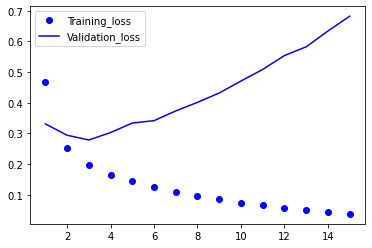

In [54]:
import matplotlib.pyplot as plt
epochs = range(1,len(history.history['acc'])+ 1)
plt.plot(epochs,history.history['loss'],'bo',label='Training_loss')
plt.plot(epochs,history.history['val_loss'],'b',label='Validation_loss')
plt.legend()

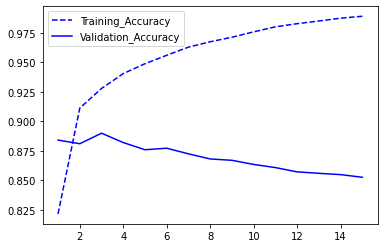

In [55]:
epochs = range(1,len(history.history['acc'])+ 1)
plt.plot(epochs,history.history['acc'],'b--',label='Training_Accuracy')
plt.plot(epochs,history.history['val_acc'],'b',label='Validation_Accuracy')
plt.legend()

## it is evident that the model performed well at epoch 3

Retraining the model from scratch

In [57]:

model = models.Sequential()
model.add(layers.Dense(8,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(2,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model.summary()
history = model.fit(X_train,y_train,epochs = 3, batch_size= 128,validation_data=(X_test,y_test))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 8)                 80008     
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 18        
Total params: 80,098
Trainable params: 80,098
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 3s 113us/step - loss: 0.5336 - accuracy: 0.7139 - val_loss: 0.4575 - val_accuracy: 0.7322
Epoch 2/3
25000/25000 [==============================] - 3s 110us/step - loss: 0.3860 - accuracy: 0.7916 - val_loss: 0.3942 - val_accuracy: 0.8598
Epoch 3/3
25000/25000 [=============

In [0]:
results = model.predict(X_test)

In [59]:
res_eval = model.evaluate(X_test,y_test)
res_eval

25000/25000 [==============================] - 1s 58us/step


[0.3543961787605286, 0.8791599869728088]

In [61]:
print(f'Loss : {np.around(res_eval[0] * 100.0)}% Accuracy : {np.around(res_eval[1] * 100.0)}%')

Loss : 35.0% Accuracy : 88.0%


##Multiclass Classification using Keras

In [99]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)
print(train_data.shape,test_data.shape)

(8982,) (2246,)


## Perform one hot encoding for Feature vectors

In [0]:
def vectorize_sequences(sequence,dimensions=10000):
  results = np.zeros((len(sequence),dimensions))
  for i,item in enumerate(sequence):
    results[i,item] = 1.
  return results

In [101]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
print(X_train.shape,X_test.shape)

(8982, 10000) (2246, 10000)


In [0]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [70]:
print(y_train.shape,y_test.shape)

(8982, 46) (2246, 46)


# Build Model

In [74]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_32 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_33 (Dense)             (None, 46)                1518      
Total params: 643,662
Trainable params: 643,662
Non-trainable params: 0
_________________________________________________________________


In [75]:
history = model.fit(X_train,y_train,epochs=25,batch_size=128,validation_data=(X_test,y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/25
8982/8982 [==============================] - 2s 177us/step - loss: 2.4339 - acc: 0.4541 - val_loss: 1.4842 - val_acc: 0.6674
Epoch 2/25
8982/8982 [==============================] - 1s 159us/step - loss: 1.1438 - acc: 0.7507 - val_loss: 1.1476 - val_acc: 0.7458
Epoch 3/25
8982/8982 [==============================] - 1s 161us/step - loss: 0.7486 - acc: 0.8367 - val_loss: 1.0121 - val_acc: 0.7747
Epoch 4/25
8982/8982 [==============================] - 1s 163us/step - loss: 0.4996 - acc: 0.8938 - val_loss: 0.9598 - val_acc: 0.7854
Epoch 5/25
8982/8982 [==============================] - 1s 158us/step - loss: 0.3497 - acc: 0.9297 - val_loss: 0.9835 - val_acc: 0.7858
Epoch 6/25
8982/8982 [==============================] - 1s 163us/step - loss: 0.2631 - acc: 0.9413 - val_loss: 0.9598 - val_acc: 0.7947
Epoch 7/25
8982/8982 [==============================] - 1s 159us/step - loss: 0.2176 - acc: 0.9478 - val_loss: 1.0083 - val_acc: 0.7903


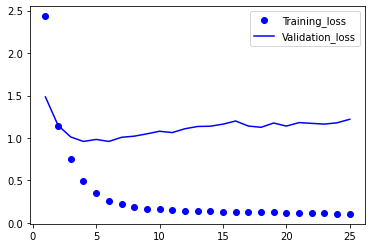

In [76]:
epochs = range(1,len(history.history['acc'])+ 1)
plt.plot(epochs,history.history['loss'],'bo',label='Training_loss')
plt.plot(epochs,history.history['val_loss'],'b',label='Validation_loss')
plt.legend()

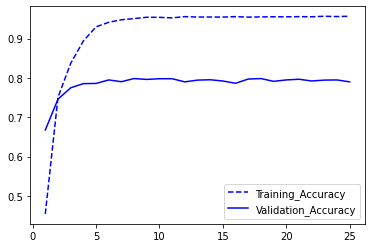

In [77]:
epochs = range(1,len(history.history['acc'])+ 1)
plt.plot(epochs,history.history['acc'],'b--',label='Training_Accuracy')
plt.plot(epochs,history.history['val_acc'],'b',label='Validation_Accuracy')
plt.legend()

Retraining the model with epochs = 12, as it gives a better performance/ accuracy

In [85]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
#model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.summary()
history = model.fit(X_train,y_train,epochs=25,batch_size=128,validation_data=(X_test,y_test))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_49 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_50 (Dense)             (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________
Train on 8982 samples, validate on 2246 samples
Epoch 1/25
8982/8982 [==============================] - 1s 164us/step - loss: 2.0651 - acc: 0.5747 - val_loss: 1.3571 - val_acc: 0.6968
Epoch 2/25
8982/8982 [==============================] - 1s 153us/step - loss: 1.0134 - acc: 0.7772 - val_loss: 1.0643 - val_acc: 0.7667
Epoch 3/25
8982/8982 [==============================] - 1

In [91]:
res_eval = model.evaluate(X_test,y_test)
print(f'Loss : {np.round(res_eval[0] * 100.0)}% Accuracy : {np.round(res_eval[1] * 100.0)}%')



2246/2246 [==============================] - 0s 82us/step
Loss : 109.0% Accuracy : 80.0%


In [89]:
res_eval

[1.0921847421148476, 0.8023152351379395]

## Regression Problem using Keras

In [139]:
from keras.datasets import  boston_housing
(train_data,train_labels),(test_data,test_labels) = boston_housing.load_data()
print(train_data.shape,test_data.shape)

(404, 13) (102, 13)


In [140]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(train_data)
X_train = sc.transform(train_data)
X_test = sc.transform(test_data)

In [142]:
X_train.shape

(404, 13)

In [0]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64,activation='relu',input_shape=(13,)))
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  model.summary()
  return model

In [146]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
all_scores = []
for train_index, test_index in kf.split(X_train):
  train,test = X_train[train_index],X_train[test_index]
  train_label,test_label = train_labels[train_index],train_labels[test_index]
  model = build_model()
  model.fit(train,train_label,epochs=100,batch_size=1,verbose=0)
  val_mse,val_mae= model.evaluate(test,test_label)
  all_scores.append(val_mse)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
81/81 [==============================] - 0s 221us/step
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_25 (Dense)             (None, 64)  

In [147]:
np.mean(all_scores)

13.921545652695645

In [149]:
results = model.evaluate(X_test,test_labels)

102/102 [==============================] - 0s 150us/step


In [150]:
results 

[25.780269847196692, 2.925975799560547]

In [152]:
print(f'RMSE : {np.sqrt(results[0])} , MAE : {results[1]}')

RMSE : 5.077427483204136 , MAE : 2.925975799560547
